# Project 0: Inaugural

Imports and set magics:

In [1]:
import numpy as np

from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt # baseline modul

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We are given a quasi-linear utility function of the consumer. The consumer wants to maximize the utility by choosing the optimal level of consumption,c, and labor supply, l. We have chosen to solve this problem with a solver. 


**First of all,** we define the utility function, total resources, function for printing the solution and given parameters. For a start, we have set w = 0.75, to show that the code solves the model.

In [5]:
# Functions used to solve the problem

# Define the utility function
def u_func(c,l,v,eps):
    utility = np.log(c)-v*(l**(1+(1/eps))/(1+(1/eps)))
    return utility

# Define total resources
def total_resources(m,w,l,tax0,tax1,k):
    x = m+w*l-(tax0*w*l + (tax1*np.fmax(w*l-k,0)))
    return x
 
 
# Define and specify print solution 
def print_solution(c,l,utility):
    print(f'c = {c:.8f}')
    print(f'l = {l:.8f}')
    print(f'u  = {utility:.8f}')

# Set parameters
m = 1
v = 10
eps = 0.3
tax0 = 0.4
tax1 = 0.1
k = 0.4
w = 0.75



The code used to solve the model is divided into the following steps:

**a.** We start by defining the **objective function**, where the value of choice is l (labor supply). In this function we specify that c (consumption) must equal x (total resources) when maximized. Maximizing utility is done by minimizing -u_func, where u_func is the utility function defined above.

**b.** Next, we **call the solver.** Here we specify that we use the method 'bounded' as we are looking for a local minimum of the objective function within the bounds of the value we want to maximize with respect to. It is given that l ∈ (0,1), so bounds is set to this interval. Furthermore, the extra arguments in the objective function are specified.

**c.** At last, we unpack the **solution** and print it using our print function. The solution gives us the consumer's optimal level of consumption, c, and the optimal level of labor supply, l, which implies a maximized utility, u. 

In [6]:

# a. Define the objective function
def value_of_choice(l,m,w,tax0,tax1,k,eps,v):
    c =  total_resources(m,w,l,tax0,tax1,k)
    return -u_func(c,l,v,eps)


# b. Call the solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))

# c. Unpack and print the solution: 
l = sol_case1.x
c = total_resources(m,w,l,tax0,tax1,k)
utility = u_func(c,l,v,eps)
print_solution(c,l,utility)

c = 1.16935252
l = 0.37633892
u  = 0.12302908


# Question 2

We want to plot the optimal consumption level and labor supply as functions of the wage, w. 

We define w and l using numpy linspace, where wage w is set to a range from 0.5 to 1.5, called w_vec, and l is set the a range from 0 to 1, called l_values. Furthermore, consumption is defined as a function of total resources, as consumption equals total resources.

Next, we plot consumption c as a function of wages in a figure called fig_c and plot labour l as a function of wages in a figure called fig_l.

Text(0,0.5,'$l$')

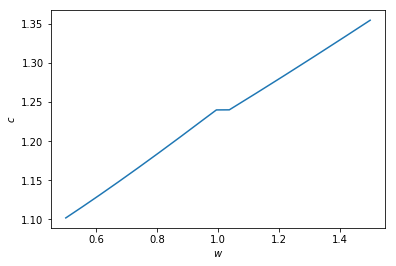

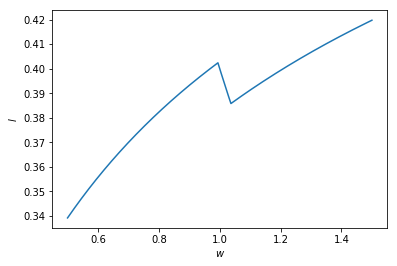

In [7]:
# Define values
N = 10000
w_vec = np.linspace(0.5,1.5,N)

def value_of_choice(l,m,w,tax0,tax1,k,eps,v):
    c =  total_resources(m,w,l,tax0,tax1,k)
    return -u_func(c,l,v,eps)

l_values = np.zeros(N)

for i, w in enumerate(w_vec): 
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))
    l_values[i] = sol_case1.x

c_values_alt = total_resources(m,w_vec,l_values,tax0,tax1,k)

# Plot consumption as a function of wage 
fig_c = plt.figure()
ax = fig_c.add_subplot(1,1,1)
ax.plot(w_vec,c_values_alt)

# Add labels
ax.set_xlabel('$w$')
ax.set_ylabel('$c$')

# Plot labor as a function of wage
fig_l = plt.figure()
ax2 = fig_l.add_subplot(1,1,1)
ax2.plot(w_vec, l_values)

# Add labels
ax2.set_xlabel('$w$')
ax2.set_ylabel('$l$')

# Question 3

We seek to calculate the tax revenue:

$$
\begin{aligned}
T = \sum_{i=1}^{N} [\tau_{0}w_{i}l^{*}_{i}+\tau_{1}max\{w_{i}l^{*}_{i}-k,0\}]
\end{aligned}
$$

For a population with N = 10.000 individuals indexed by $i$.

It is assumed that distribution of wages is uniform, such that:

$$
\begin{aligned}
w_{i}\sim\mathcal{U}(0.5,1.5)
\end{aligned}
$$


We solve the problem in the following steps

a. First, we define the population size N = 10.000 and specify that w is uniformly distributed between 0.5 and 1.5

b. We **call the solver,** such that utility is maximized for every individual i with wage w, which is drawn from the uniform distribution as specified above. Furthermore, we calculate the tax revenue for every consumer, i, who has maximzed utility

c. We calculate the total tax revenue with numpy sum, which sums tax revenue for all individuals i.

In [18]:
# a. Define N, seed and define w as a uniform distribution from 0.5 to 1.5
np.random.seed(888)
N = 10000
w_uni = np.random.uniform(0.5,1.5, size=N)

l_values = np.zeros(N)

# b. Call the solver for each individual
for i, w in enumerate(w_uni):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))
    l_values[i] = sol_case1.x

tax_i = tax0*w_uni*l_values+tax1*np.fmax(w_uni*l_values-k,0)
    
# Calculate total tax revenue
total_tax = np.sum(tax_i)
print(f'Total tax revenue = {total_tax:.4f}')

Total tax revenue = 1637.5474


# Question 4

We wish to examine what a the tax revenue would be if the Frischian elasticity is decreased to $\varepsilon=0.1$

We now redefine the parameters and functions used to solve the consumer problem insode our loop, in order to calculate the total tax revenue for $\varepsilon=0.1$.

In [19]:
np.random.seed(888)

for i, w in enumerate(w_uni):
    #For every individual i, we set parameters, where epsilon is now eps = 0.1: 
    m = 1
    v = 10
    eps = 0.1
    tax0 = 0.4
    tax1 = 0.1
    k = 0.4
    
    # We call the solver for ever individual i, and calculate the tax revenue from every individual: 
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))

    l_values[i] = sol_case1.x
    tax_i = tax0*w_uni*l_values+tax1*np.fmax(w_uni*l_values-k,0)

# We calculate the total tax revenue by summing the tax revenue from every individual and print the result: 
total_tax = np.sum(tax_i)
print(f'Total tax revenue = {total_tax:.4f}')

Total tax revenue = 3210.0936


Thus, we find that the total tax revenue is higher the lower the Frischian elasticity is.

The Frischian elasticity measures the elasticity of labour with respect to the wage, holding the marginal utility of wealth fixed. Thus, it measures the substitution effect of a change in the wage on the labour supply.

The tax revenue is higher because a lower Frischian elasticity implies that the individuals will sustitute less towards leisure when taxes are decreased taxes. Hence labor supply does not react as strong to taxes, ceteris paribus, implying higher tax revenue.


(In general, there are no income effects with quasilinear utility, as we have here, only substitution effects)

# Question 5

We wish to find the tax rates $\tau_{0}$ and $\tau_{1}$ and the optimal cut off $\kappa$ for the top income labor bracket, which maximize the tax revenue.

We solve the problem with a loop which loops over different combinations of tax rates $\tau_{0}$ and $\tau_{1}$ and cut off $\kappa$. Everytime it loops over a solution better than the previous, it replaces the parameters of the variables denoting the best guesses of the optimal values. In the end the most optimal values of the tax rates and the cut off are returned.

In [22]:
def find_best_tax(N1,N2,N3,do_print=True):

    #wages
    np.random.seed(888)

    tax0_values = np.linspace(0,1,N1)
    tax1_values = np.linspace(0,1,N2)
    k_values = np.linspace(0,1,N3)


    #guess
    tax0_best=0
    tax1_best=0
    k_best=0
    tax_best = 0

    # Looping through all possibilities
    for n in range(N1):
        for j in range(N2):
            for g in range(N3):
                t0 = tax0_values[n]
                t1 = tax1_values[j]
                k = k_values[g]
                
                # Utility max for all individuals
                for i, w in enumerate(w_uni):
                    sol_case2 = optimize.minimize_scalar(value_of_choice,
                    method='bounded',bounds=(0,1),args=(m,w,t0,t1,k,eps,v))
                    l_values[i] = sol_case2.x
                    # Tax payment per individual
                    tax_i_2 = tax0*w_uni*l_values+tax1*np.fmax(w_uni*l_values-k,0)
                total_t = np.sum(tax_i_2)

                if total_t > tax_best:
                    tax0_best = tax0_values[n]
                    tax1_best = tax1_values[j]
                    k_best = k_values[g]
                    tax_best = total_t
    #d. print
    if do_print:
        print_solution(tax0_best,tax1_best,k_best,tax_best)

    return tax0_best,tax1_best,k_best,tax_best
    
# function for printing the solution
def print_solution(t0,t1,kk,tt):
    print(f'tax0 = {t0:.4f}')
    print(f'tax1 = {t1:.4f}')
    print(f'k  = {kk:.4f}')
    print(f'total_tax = {tt:.4f}') 

sol = find_best_tax(5,5,5)

KeyboardInterrupt: 

# Conclusion

**In question 1**, utility is maximized when the consumer choose consumption; c = 1.1735 and labor supply; l = 0.3559. This implies a utility of u  = 0.1337. 

**In question 2** we see from the plot of consumption as a function of the wage, that consumption increase exponentially with the wage. From the plot of labor supply as a function of the wage, we see that labor supply is a linear and increasing function of the wage. Thus, the higher wage rate the higher is the optimal level of consumption and the higher is the optimal level of labor supply. 

**In question 3** we calculate that the total tax revenue, given as the sum of the tax revenue from every consumer's tax payment, after every consumer have maximized their uility, is 1708.7754. 

**In question 4** we see that this tax revenue increase to 3623.2067, when the Frisch elasticity of labor supply is decreased to 0.1. 

 **In question 5** we see that the $\tau_{0}=0.8947$, $\tau_{1}=0.00$ and $\kappa=0.00$ returns the highest possible tax revenue